In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [109]:
# Import data
df = pd.read_csv(
    'https://query.data.world/s/lxnrwj5w73bsigranne42td54f54sm')

/Users/chacha/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (29,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [110]:
df.shape

(20632, 68)

In [111]:
df.head()

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,32 days 06:02:33.000000000,32 days 06:02:33.000000000,0,32,32,0,0,0,0,0


In [112]:
# Drop irrelavent column
df.drop(columns="Unnamed: 0", axis =1, inplace = True)

In [113]:
df.columns

Index(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency', 'currency_symbol',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'creator', 'location', 'category', 'profile',
       'spotlight', 'urls', 'source_url', 'friends', 'is_starred',
       'is_backing', 'permissions', 'name_len', 'name_len_clean', 'blurb_len',
       'blurb_len_clean', 'deadline_weekday', 'state_changed_at_weekday',
       'created_at_weekday', 'launched_at_weekday', 'deadline_month',
       'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month',
       'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr',
       'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'create_to_launch

# Clean data

In [116]:
# Check the missing value
# there are 1889 missing value in category
missing_var = pd.DataFrame(
    df.isna().sum(axis = 0), columns = ['total_missing'])
missing_var[missing_var['total_missing'] > 0]*100/df.shape[0]

,total_missing
blurb,0.024234
location,0.218108
category,9.155680
friends,99.709190
is_starred,99.709190
is_backing,99.709190
permissions,99.709190
name_len,0.024234
name_len_clean,0.024234
blurb_len,0.024234


In [41]:
# impute missing category by 'Missing'
df.category = df.category.fillna('Other')

In [42]:
# Remove rows with missing name or blurb
df = df[~(df.blurb.isna() | df.name.isna())]

In [43]:
# Change data type to date
df.deadline = pd.to_datetime(df.deadline)
df.state_changed_at = pd.to_datetime(df.state_changed_at)
df.created_at = pd.to_datetime(df.created_at)
df.launched_at = pd.to_datetime(df.launched_at)

In [44]:
# Data type
df.dtypes.value_counts()

int64             26
object            25
float64            8
bool               4
datetime64[ns]     4
dtype: int64

**Included**
- goal
- SuccessfulBool
- disable_communication
- category
- name_len_clean
- blurb_len_clean
- create_to_launch_days
- launch_to_deadline_days
- staff_pick


**Not included future information**
- backers_count
- usd_pledged
- spotlight
- backers_count

**Not sure to included**
- name_len_clean
- blurb_len_clean
- deadline_weekday
- state_changed_at_weekday
- created_at_weekday
- launched_at_weekday
- LaunchedTuesday
- DeadlineWeekend
- launch_to_state_change_days
- deadline_month
- deadline_day
- state_changed_at_month
- state_changed_at_day
- created_at_month
- created_at_day
- launched_at_month
- launched_at_day

**Not consider to include because 99% missing**
- friends (99.71% of missing data, not missing recored as blank list)
- is_starred (99.71% of missing data, not missing recorded as 'False')
- is_backing (99.71% of missing data, not missing recorded as 'False')
- permissions (99.71% of missing data, not missing recored as blank list)

**Not included because they contained date, diff between date will be more meaningful**
- created_at
- deadline
- stated_change_at
- launched_at

**Not included because after filter only USD, they contained only 1 level of value.**
- USorGB
- TOPCOUNTRY

**Not included too details**
- deadline_hr
- state_changed_at_hr
- created_at_hr
- launched_at_hr

**Noted** Text variables - not included

From the client request, I will choose only data in USD and state in `successful` and `failed` because `canceled` contained projects that are scam or copy cat. While `live` and `suspended` did not indicate the successful projects.

In [45]:
df.state.value_counts()

failed        11416
successful     6018
canceled       2455
live            508
suspended       230
Name: state, dtype: int64

In [46]:
df.currency.value_counts()

USD    14138
GBP     2497
EUR     1618
CAD     1098
AUD      673
DKK      123
NZD      111
SEK       96
CHF       94
NOK       64
MXN       55
HKD       35
SGD       25
Name: currency, dtype: int64

In [47]:
# Convert all goal to USD and change unit to be 1000 USD
df['usd_goal'] = df.static_usd_rate * df.goal/1000

# Change currency for USD and other currency
df.loc[df.currency != 'USD', 'currency'] = 0
df.loc[df.currency == 'USD', 'currency'] = 1

# Change data type to int
df.loc[:, 'currency'] = df.currency.astype(int)

In [49]:
df.currency.value_counts()

1    14138
0     6489
Name: currency, dtype: int64

In [50]:
eda_variables = ['usd_goal', 'state', 'SuccessfulBool', 'disable_communication', 
                 'backers_count', 'usd_pledged', 'staff_pick', 'spotlight',
                 'category', 'name_len_clean', 'blurb_len_clean', 'currency', 
                 'create_to_launch_days', 'launch_to_deadline_days', 
                 'launch_to_state_change_days', 'deadline_weekday', 
                 'state_changed_at_weekday', 'created_at_weekday', 
                 'launched_at_weekday', 'LaunchedTuesday', 'DeadlineWeekend']
# Filter only selected variables and choose only success and failed in state
new_df_all = df[df.state.isin(['successful','failed'])][eda_variables].copy()
print(new_df_all.shape)

# Filter only 'USD' and choose only success and failed in state
new_df = df[(df.currency == 1) & df.state.isin(['successful','failed'])][eda_variables].copy()
print(new_df.shape)

(17434, 21)
(12030, 21)


# EDA

In [51]:
def get_categorical_percentages(df):
    cat_df = df.select_dtypes(exclude=np.number)
    for var in cat_df.columns:
        perc = df[var].value_counts() / df[var].count()
        print(var)
        print(perc,'\n')

In [52]:
def draw_hist(df, variables, n_rows, n_cols):
    """
    Function: draw histogram of all variables
              in data Frame
              
    Parameters
    ----------
    df: DataFrame data
    variables: list variables in the plot
    n_rows: int number of rows that will be shown
    n_cols: int number of columns that will be shown
    
    Return
    ---------
    Plots from listed variables
    """
    fig = plt.figure()
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        ax.tick_params(axis='x', rotation=45)
        if df[var].dtypes == np.float64 or df[var].dtypes == np.int64:
            sns.histplot(data = df, x = var, ax = ax)
        else:
            sns.countplot(data = df, x = var, ax = ax)
#         ax.set_title(var)
    plt.show()

In [53]:
def draw_outcome_plots(df, var, outcome, n_rows, n_cols, size = [15,10]):
    """
    Function: Draw scatter plot or box plot
              of outcome against other variables
    
    Parameters
    ----------
    df: DataFrame data that we will draw
    var: List variables that would like to plot
    outcome: String outcome of interest
    n_rows: int number of rows that will be shown
    n_cols: int number of columns that will be shown
    
    Return
    ----------
    Plot of outcome against listed variables
    """
    
    fig = plt.figure(figsize=(size[0],size[1]))
#     var = df.columns.drop(outcome)
    for i, var in enumerate(var):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        plt.subplots_adjust(hspace=0.5)
        ax.tick_params(axis='x', rotation=45)
        if df[var].dtypes == np.float64 or df[var].dtypes == np.int64:
            sns.boxplot(data = df, x = outcome, y = var, ax = ax)
        else:
            sns.countplot(data = df, x = var, hue = outcome, ax = ax)
        ax.set_title(var)
    fig.suptitle('Scatter and Box Plots by ' + outcome)
#     return fig

## All currency

In [54]:
# Percentage of categorical data
get_categorical_percentages(new_df_all)

state
failed        0.654812
successful    0.345188
Name: state, dtype: float64 

disable_communication
False    1.0
Name: disable_communication, dtype: float64 

staff_pick
False    0.882356
True     0.117644
Name: staff_pick, dtype: float64 

spotlight
False    0.654812
True     0.345188
Name: spotlight, dtype: float64 

category
Hardware        0.157566
Web             0.156246
Software        0.126936
Gadgets         0.104967
Other           0.094471
Plays           0.062866
Apps            0.059883
Wearables       0.043077
Musical         0.040782
Festivals       0.025582
Sound           0.024550
Robots          0.023058
Flight          0.017609
Experimental    0.016806
Immersive       0.014110
Makerspaces     0.009751
Spaces          0.009177
Places          0.005736
Shorts          0.002294
Thrillers       0.001147
Webseries       0.001147
Academic        0.001147
Blues           0.001032
Comedy          0.000057
Name: category, dtype: float64 

deadline_weekday
Friday       0.1

In [29]:
new_df_all.describe()

,usd_goal,SuccessfulBool,backers_count,usd_pledged,name_len_clean,blurb_len_clean,currency,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,LaunchedTuesday,DeadlineWeekend
count,17434.000000,17434.000000,17434.000000,1.743400e+04,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000
mean,83.387418,0.345188,205.713892,2.339459e+04,5.197144,13.126190,0.690031,49.223529,34.387347,34.387461,0.222668,0.292647
std,1347.913378,0.475443,1318.849830,1.245146e+05,2.432894,3.207077,0.462494,110.581749,11.792653,11.792513,0.416049,0.454991
min,0.001000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,3.500000,0.000000,2.000000,3.476902e+01,3.000000,11.000000,0.000000,4.000000,30.000000,30.000000,0.000000,0.000000
50%,11.726831,0.000000,14.000000,8.797339e+02,5.000000,13.000000,1.000000,14.000000,30.000000,30.000000,0.000000,0.000000
75%,40.000000,1.000000,72.000000,6.923644e+03,7.000000,15.000000,1.000000,44.000000,39.000000,39.000000,0.000000,1.000000
max,100000.000000,1.000000,105857.000000,6.225355e+06,14.000000,30.000000,1.000000,1754.000000,91.000000,91.000000,1.000000,1.000000


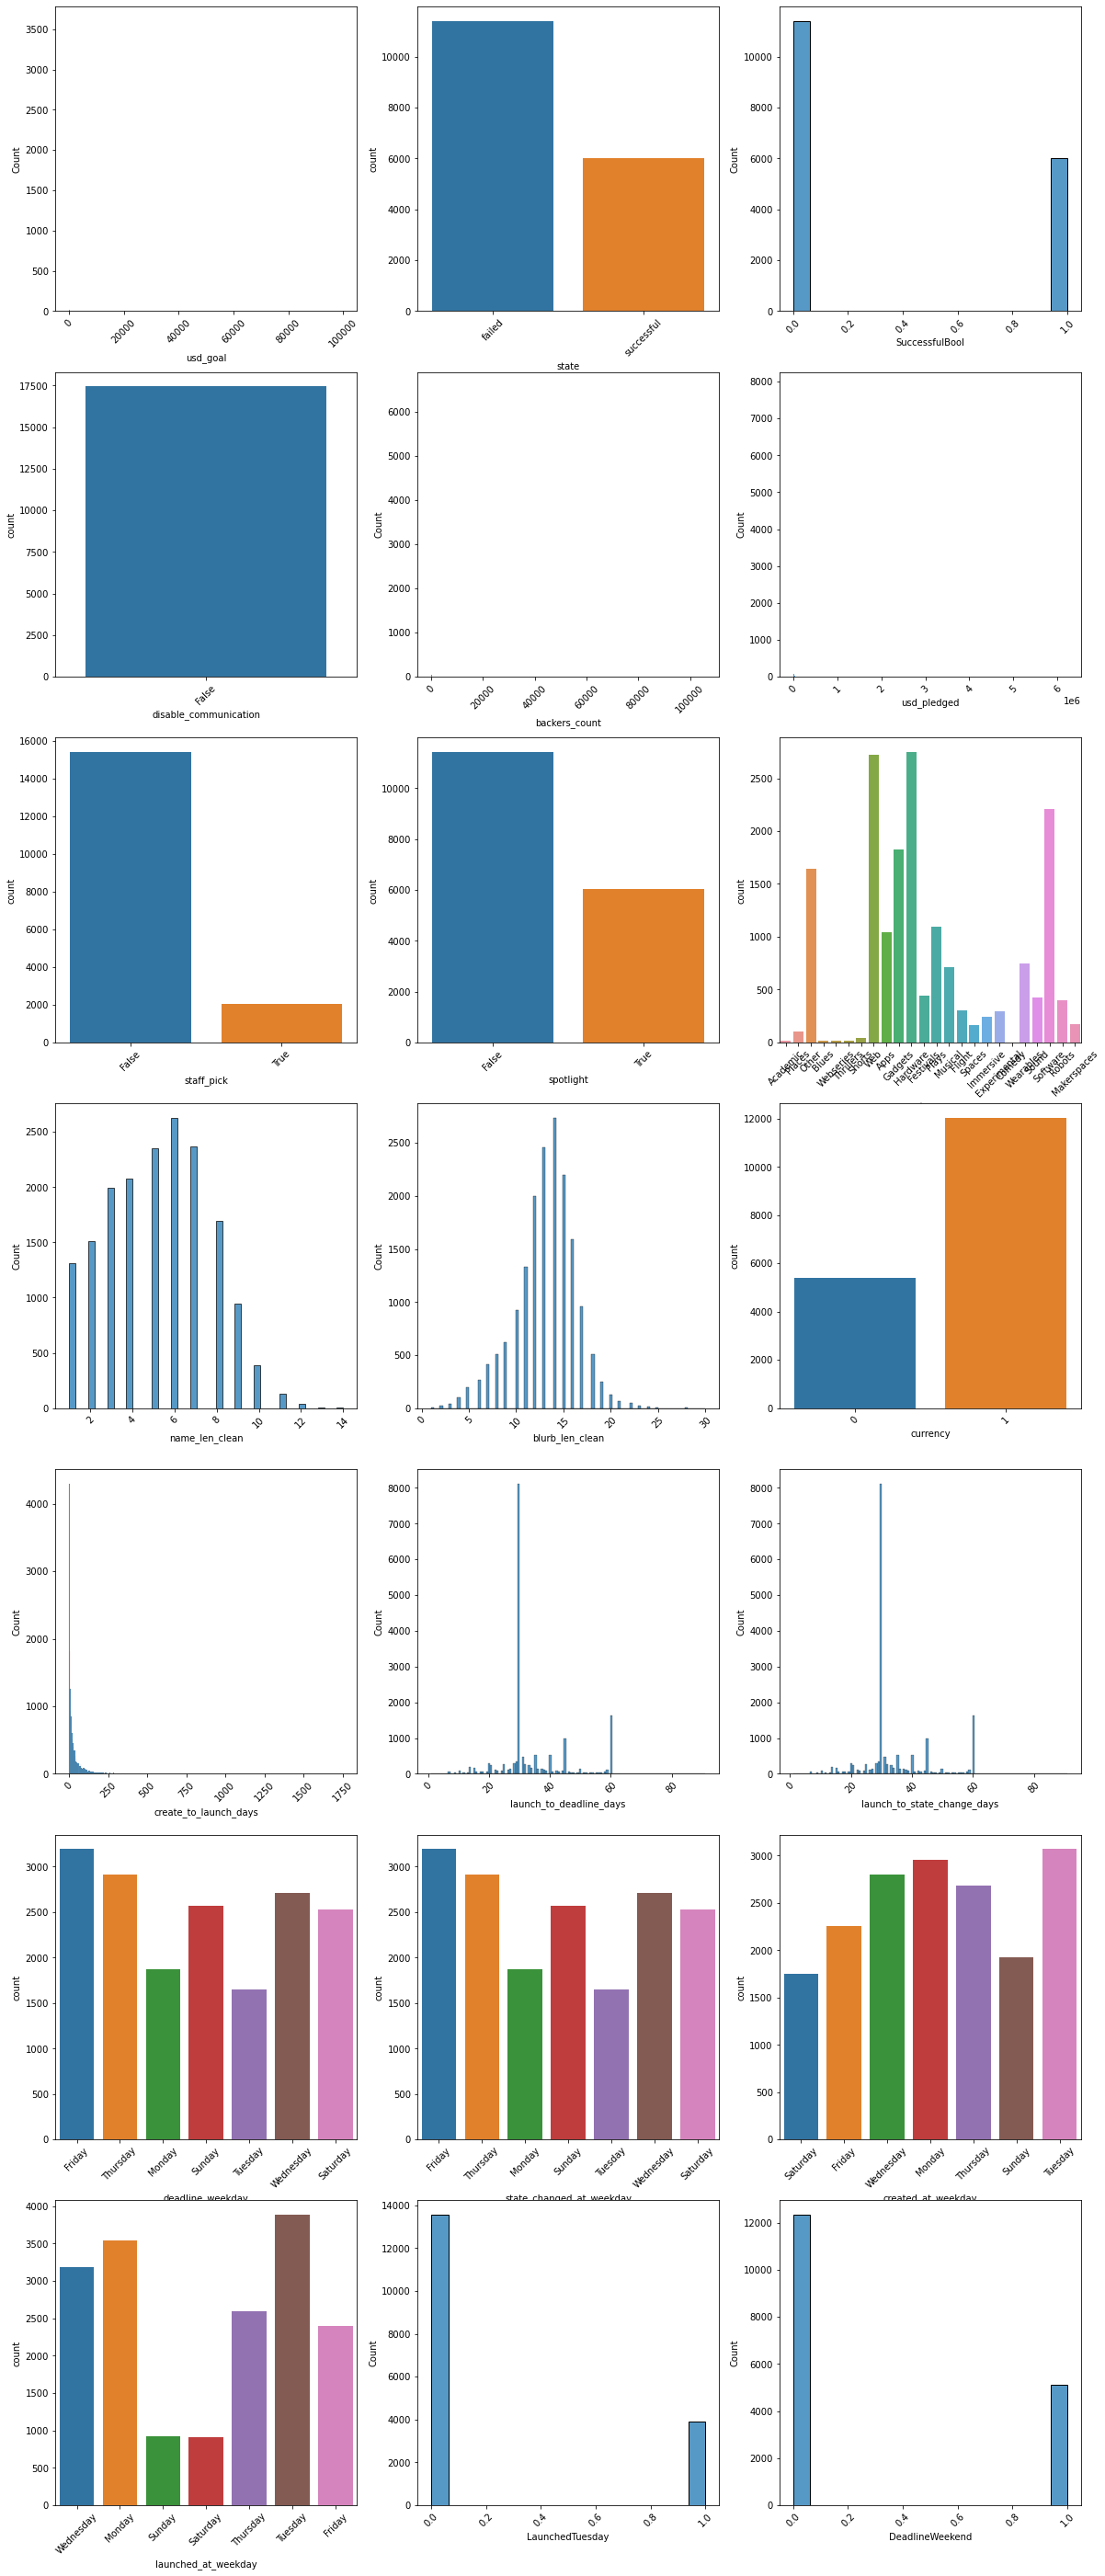

In [53]:
plt.rcParams['figure.figsize'] = [20,50]
draw_hist(new_df_all, new_df_all.columns, 7, 3)

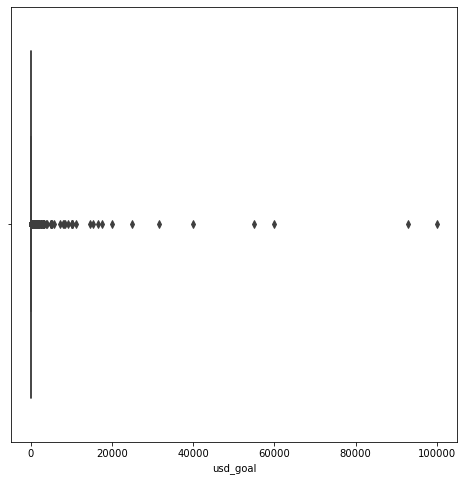

In [55]:
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(x = 'usd_goal', data = new_df_all)
plt.show()

In [61]:
new_df_all[new_df_all.usd_goal > 1e3].state.value_counts()

failed        100
successful      1
Name: state, dtype: int64

In [62]:
# Remove outliers
new_df_all = new_df_all[new_df_all.usd_goal <= 1e3].reset_index(drop = True)

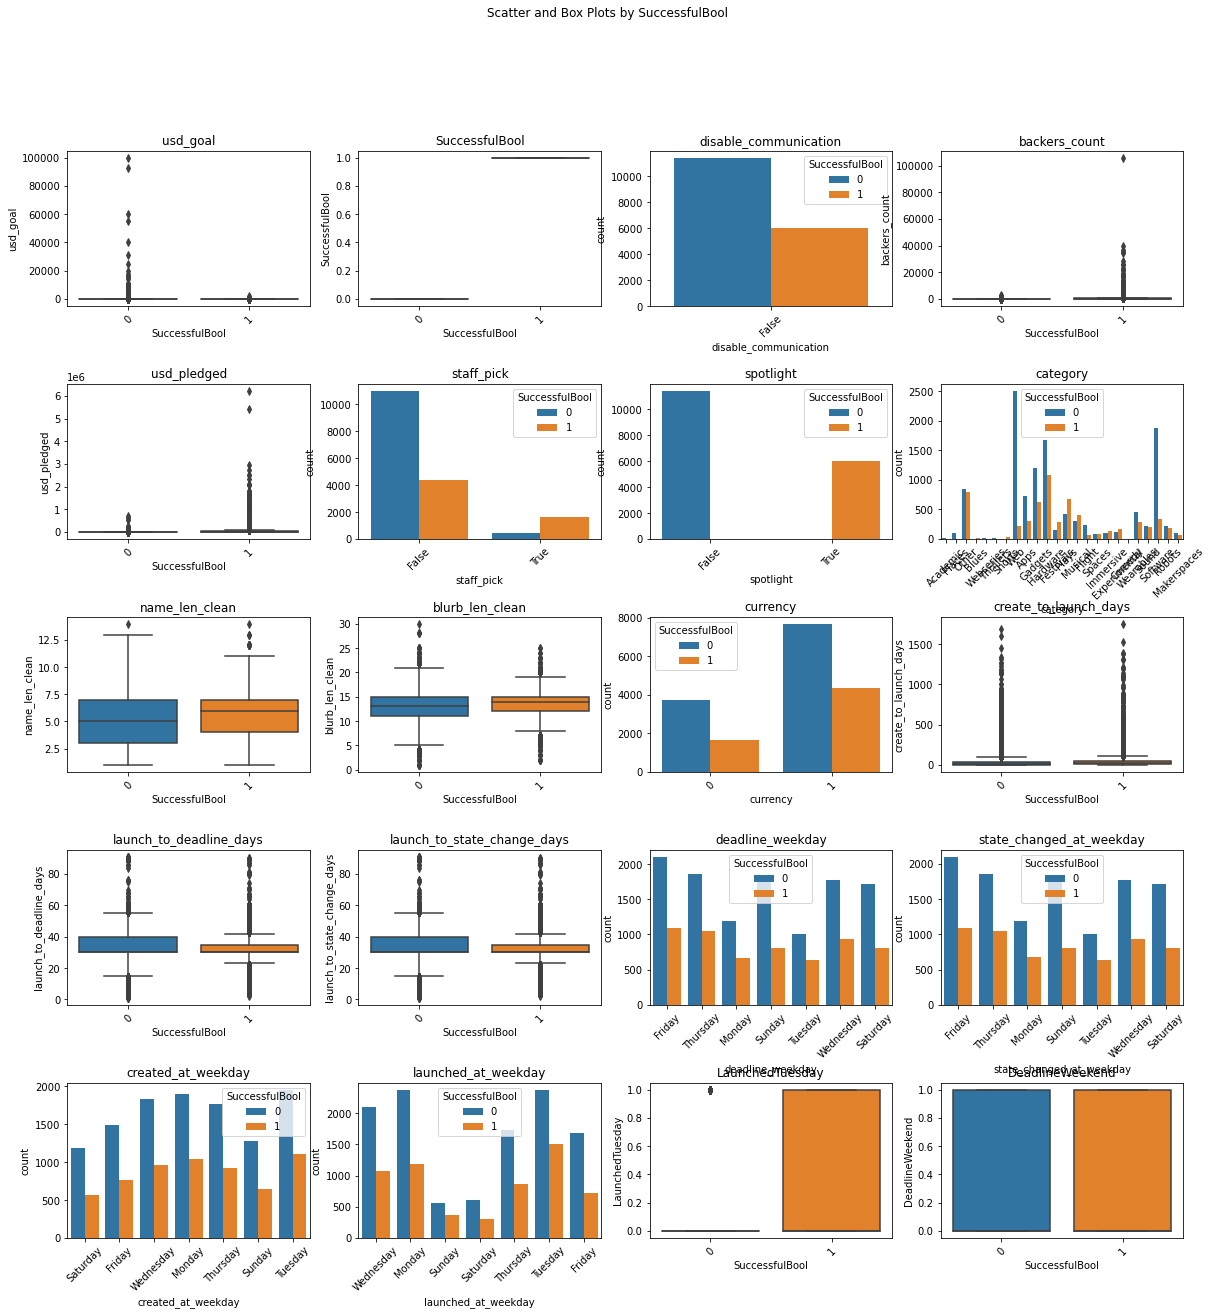

In [57]:
# Draw the comparison between outcome and other variables
plt.rcParams['figure.figsize'] = [20,30]
draw_outcome_plots(new_df_all, new_df_all.columns.delete([1]), 'SuccessfulBool', 5,4,[20,20])

## Only USD

In [131]:
# Percentage of categorical data
get_categorical_percentages(new_df)

state
failed        0.637406
successful    0.362594
Name: state, dtype: float64 

disable_communication
False    1.0
Name: disable_communication, dtype: float64 

staff_pick
False    0.869909
True     0.130091
Name: staff_pick, dtype: float64 

spotlight
False    0.637406
True     0.362594
Name: spotlight, dtype: float64 

category
Hardware        0.174148
Web             0.138487
Software        0.128346
Gadgets         0.109476
Other           0.097091
Plays           0.058770
Apps            0.055694
Wearables       0.044223
Musical         0.042311
Robots          0.025353
Sound           0.023441
Festivals       0.019202
Flight          0.017706
Experimental    0.017207
Immersive       0.014214
Makerspaces     0.010391
Spaces          0.010308
Places          0.005569
Shorts          0.002909
Webseries       0.001413
Blues           0.001330
Thrillers       0.001164
Academic        0.001164
Comedy          0.000083
Name: category, dtype: float64 

deadline_weekday
Friday       0.1

In [169]:
new_df.DeadlineWeekend.value_counts()*100/new_df.shape[0]

0    70.939318
1    29.060682
Name: DeadlineWeekend, dtype: float64

In [170]:
new_df.LaunchedTuesday.value_counts()*100/new_df.shape[0]

0    77.62261
1    22.37739
Name: LaunchedTuesday, dtype: float64

In [59]:
new_df.describe()

,usd_goal,SuccessfulBool,backers_count,usd_pledged,name_len_clean,blurb_len_clean,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,LaunchedTuesday,DeadlineWeekend
count,12030.000000,12030.000000,12030.000000,1.203000e+04,12030.000000,12030.000000,12030.000000,12030.000000,12030.000000,12030.000000,12030.000000
mean,83.139485,0.362594,243.136825,2.785754e+04,5.272735,13.060931,53.293682,34.512552,34.512718,0.223774,0.290607
std,1320.123196,0.480769,1533.776969,1.428768e+05,2.413249,3.131081,119.484083,11.909626,11.909423,0.416790,0.454061
min,0.001000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,0.000000,2.000000,5.000000e+01,3.000000,11.000000,4.000000,30.000000,30.000000,0.000000,0.000000
50%,12.000000,0.000000,17.000000,1.116000e+03,5.000000,13.000000,15.000000,30.000000,30.000000,0.000000,0.000000
75%,40.000000,1.000000,87.000000,8.487125e+03,7.000000,15.000000,48.000000,39.000000,39.000000,0.000000,1.000000
max,100000.000000,1.000000,105857.000000,6.225355e+06,14.000000,30.000000,1754.000000,91.000000,91.000000,1.000000,1.000000


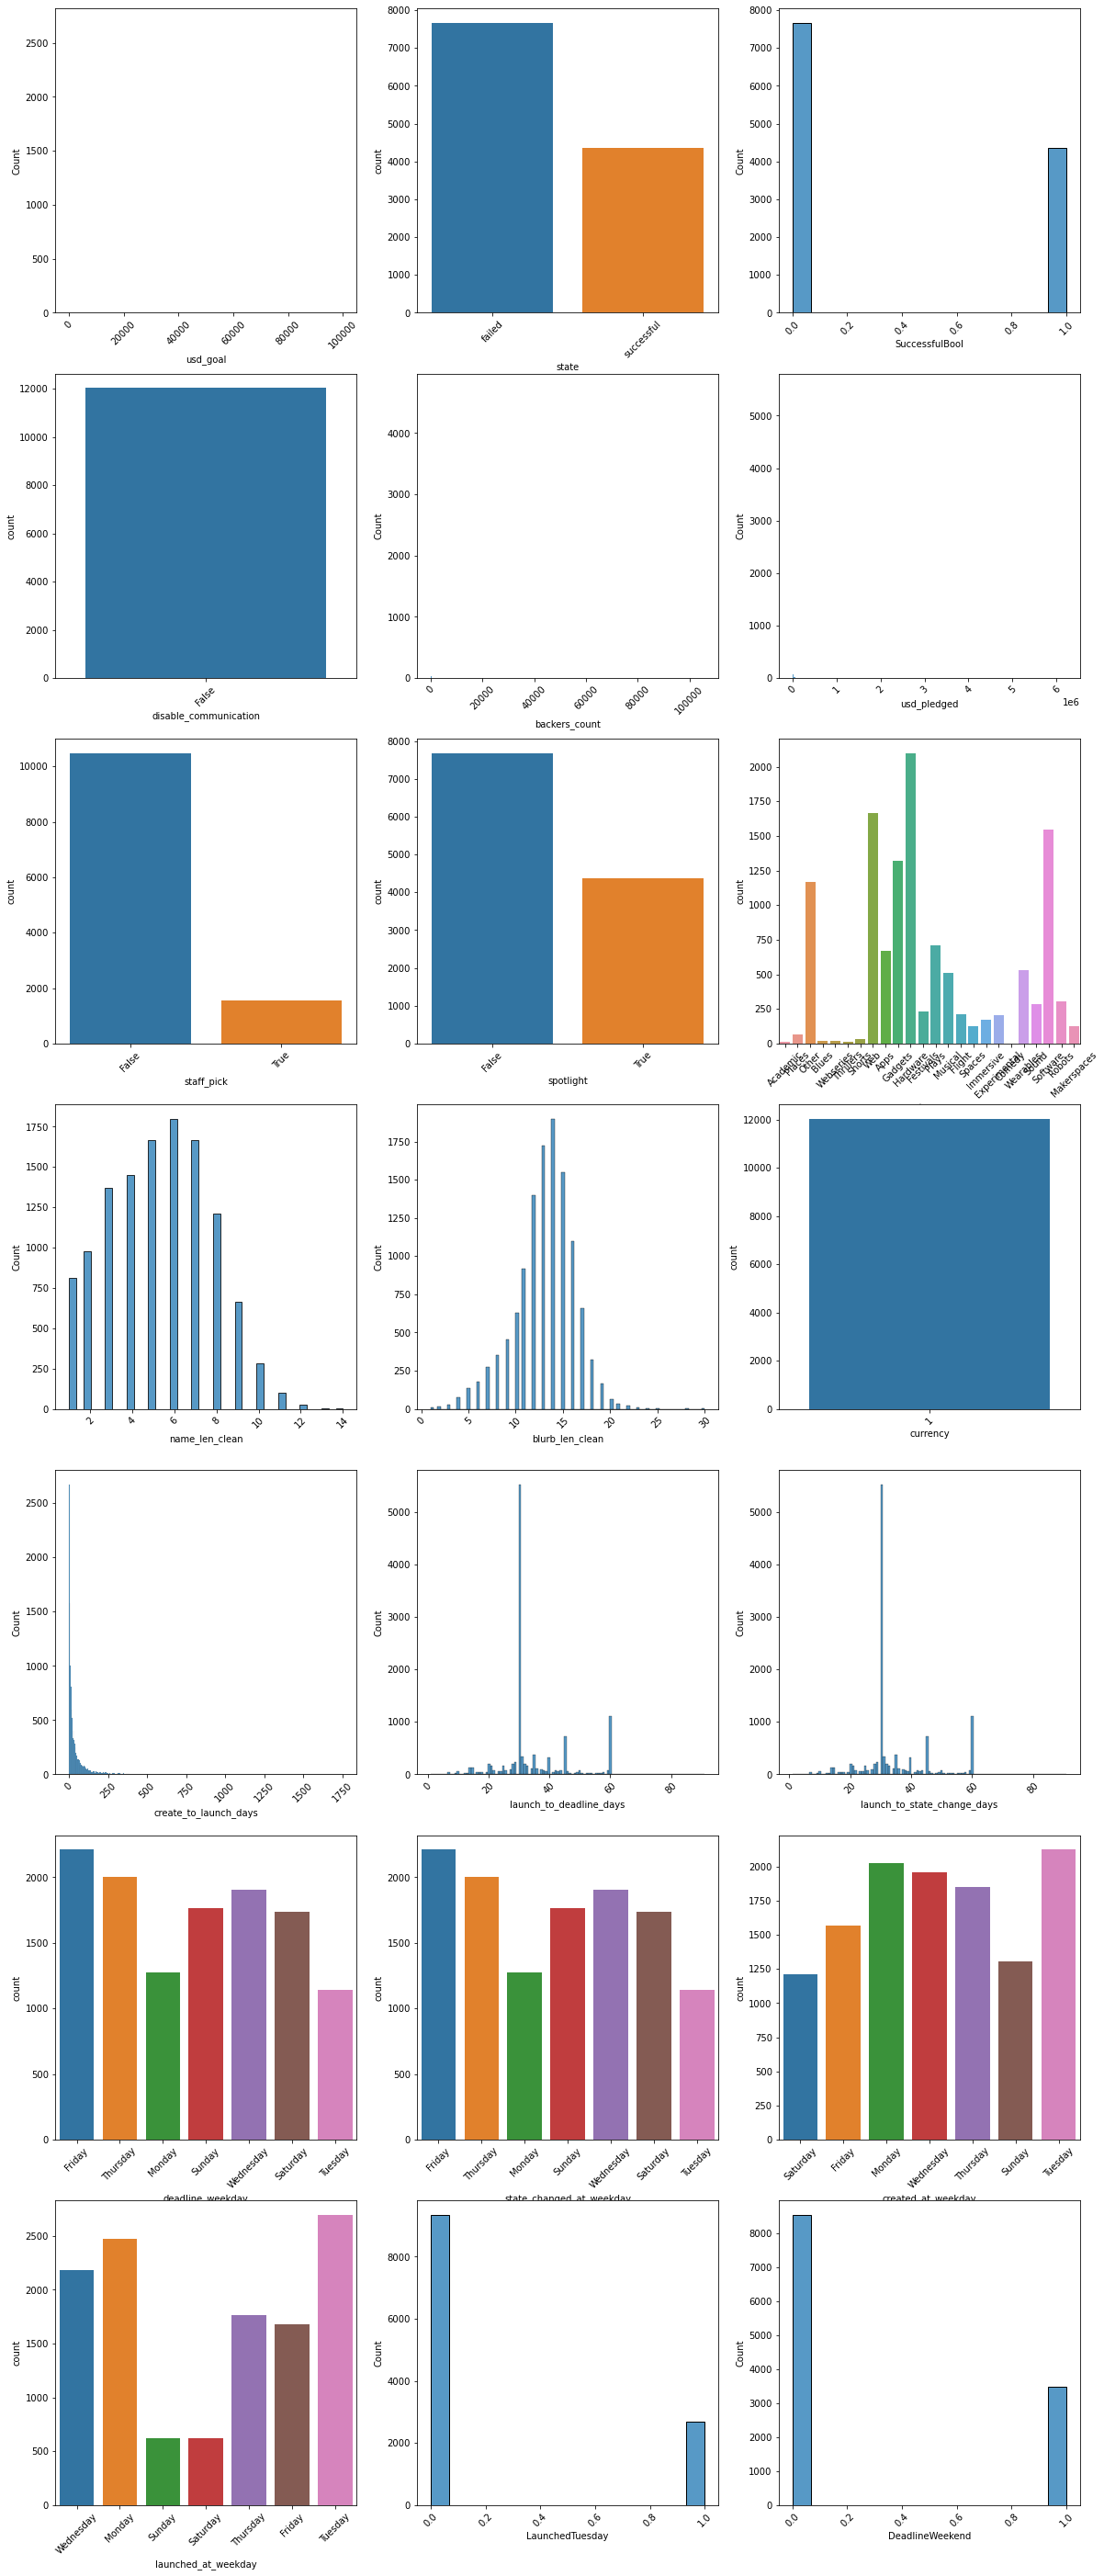

In [60]:
plt.rcParams['figure.figsize'] = [20,50]
draw_hist(new_df, new_df.columns, 7, 3)

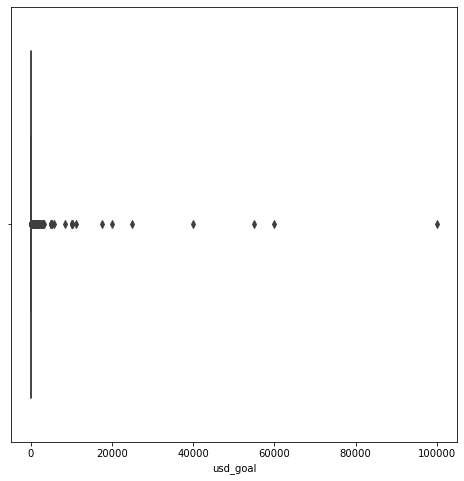

In [132]:
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(x = 'usd_goal', data = new_df)
plt.show()

In [63]:
# Since some higher goals are not reasonable, I will remove higher goal that stated as failed
new_df[new_df.usd_goal > 1e3]['state'].value_counts()

failed    63
Name: state, dtype: int64

In [64]:
# Filter outlier of goal and backers_count
new_df = new_df[new_df.usd_goal <= 1e3].reset_index(drop = True)
new_df.shape

(11967, 21)

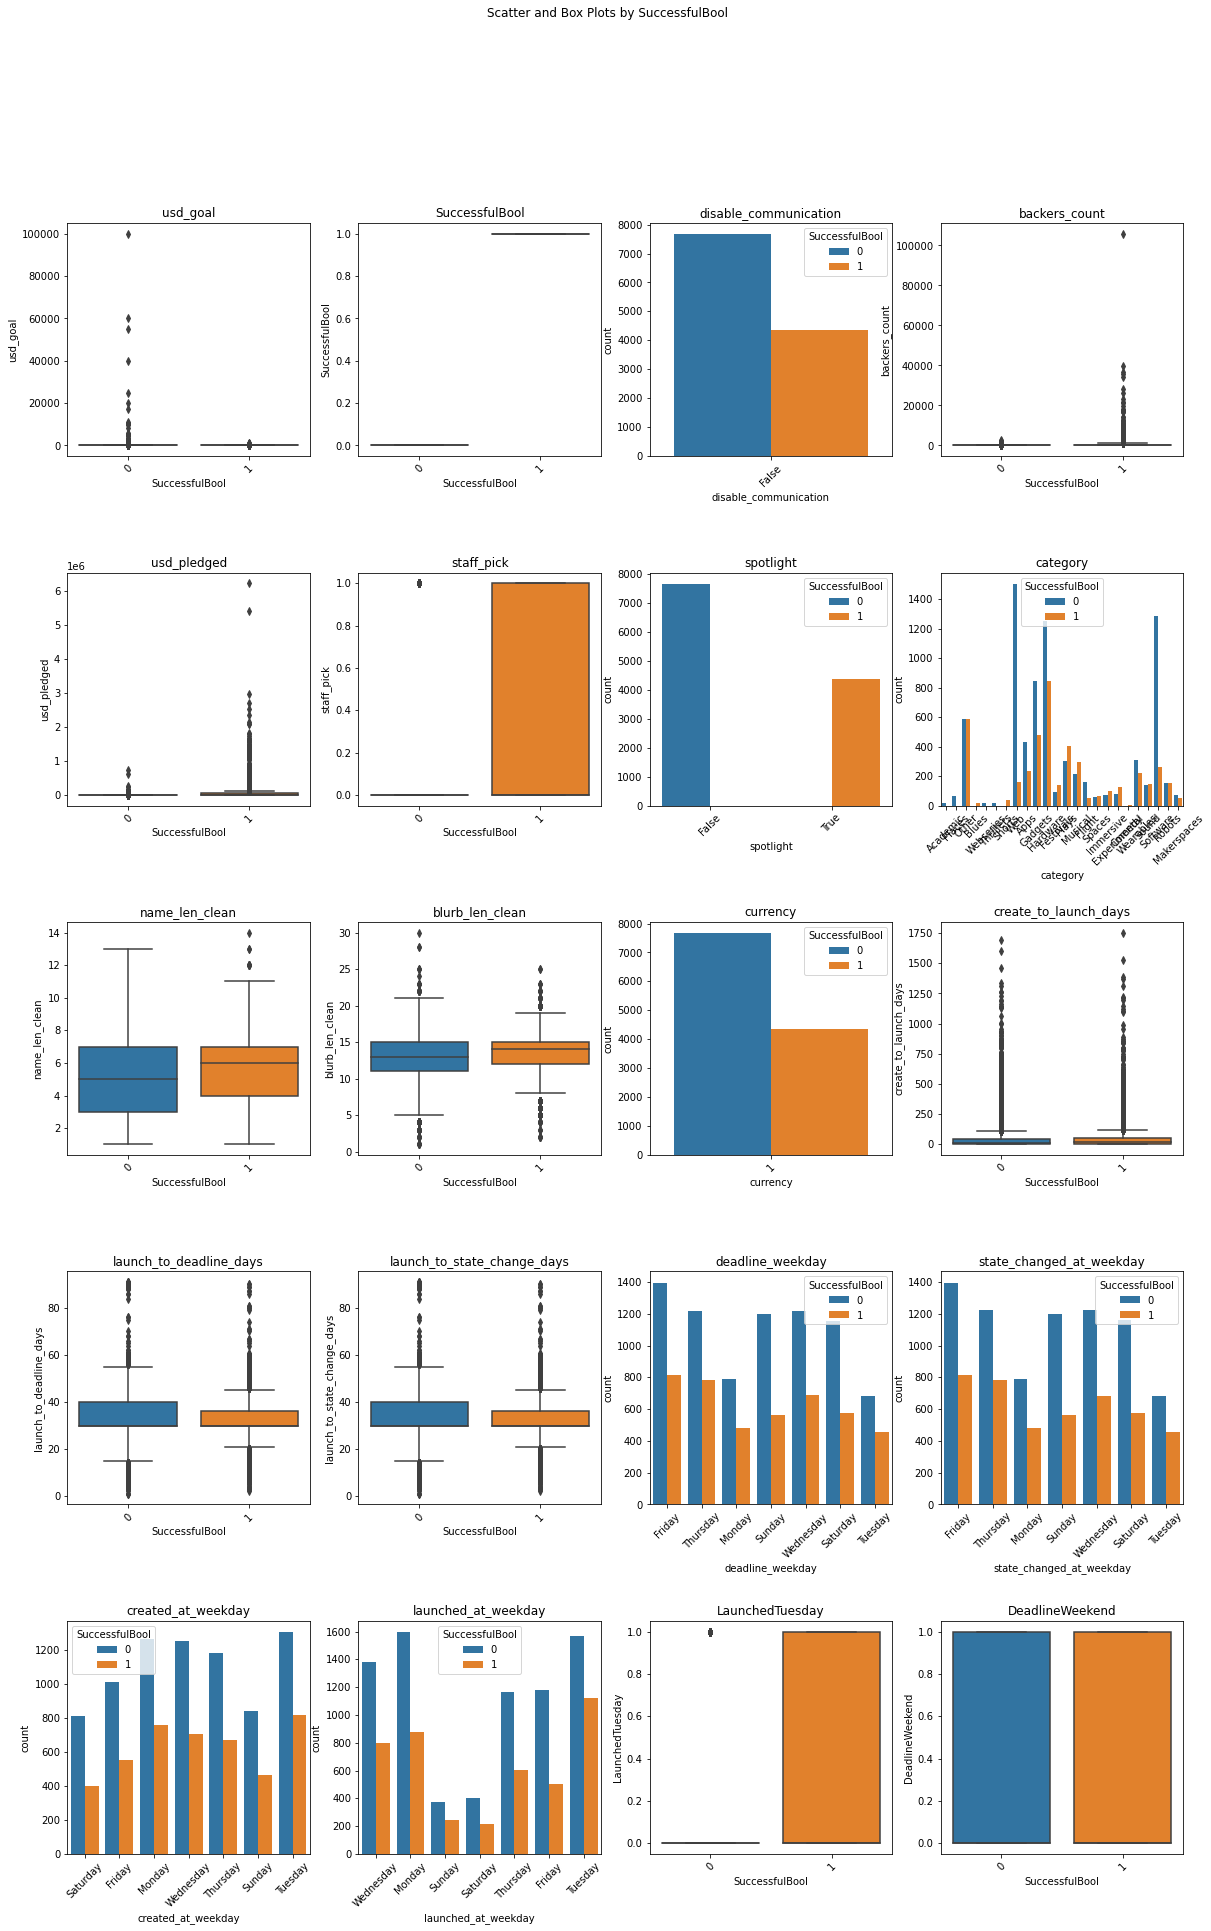

In [89]:
# Draw the comparison between outcome and other variables
plt.rcParams['figure.figsize'] = [20,40]
draw_outcome_plots(new_df, new_df.columns.delete([1]), 'SuccessfulBool', 5,4,[20,30])

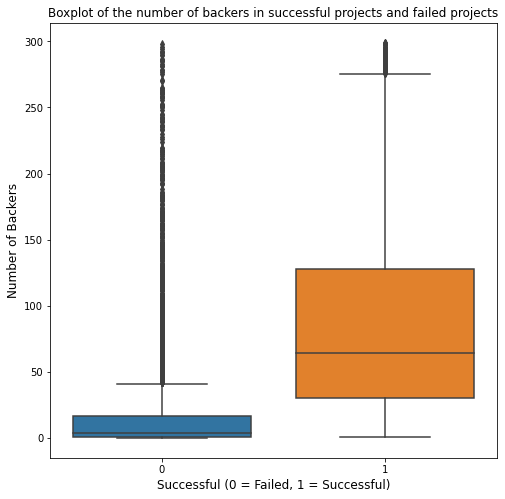

In [103]:
sns.boxplot(x = 'SuccessfulBool', y = 'backers_count', data = new_df[new_df['backers_count'] < 300])
plt.xlabel('Successful (0 = Failed, 1 = Successful)', fontsize = 12)
plt.ylabel('Number of Backers', fontsize = 12)
plt.title('Boxplot of the number of backers in successful projects and failed projects')
plt.savefig('backer_boxplot.png')
plt.show()

In [65]:
print(new_df.shape)
print(new_df_all.shape)

(11967, 21)
(17333, 21)


From EDA, we chose `usd_goal`, `category`, `staff_pick`, `name_len_clean`,`blurb_len_clean`, `create_to_launch_days`, `currency`, `launch_to_deadline_days`, `launch_to_state_change_days`

# Model

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [67]:
def odd_ratio(model):
    pval = round(model.pvalues[model.pvalues<0.05], 3)
    odd = round(np.exp(model.params[model.pvalues<0.05]), 2)
    result = pd.concat([odd, pval], axis = 1)
    result.columns = ['Odd Ratio', 'p-value']
    print(result.sort_values(by = 'Odd Ratio', ascending = False))

In [68]:
def model_result(y_true, y_pred):
    print("accuracy:", round(accuracy_score(y_true, y_pred), 2))
    print("precision:", round(precision_score(y_true, y_pred, pos_label=1), 2))
    print("recall:", round(recall_score(y_true, y_pred, pos_label=1), 2))

In [69]:
new_df.loc[:,'staff_pick'] = new_df.staff_pick.astype(int)
new_df_all.loc[:,'staff_pick'] = new_df_all.staff_pick.astype(int)

## Logistic Regression

### All currency

In [70]:
used_variables = ['usd_goal', 'category', 'staff_pick', 'name_len_clean',
                  'blurb_len_clean', 'currency', 'create_to_launch_days', 
                  'launch_to_deadline_days', 'LaunchedTuesday', 'DeadlineWeekend']

In [72]:
# Fit Logistic Regression
X_dummy = pd.get_dummies(new_df_all[used_variables], drop_first=True)
# X_dummy = sm.add_constant(X_dummy)
y = new_df_all['SuccessfulBool']
logit_res = sm.GLM(y.astype(int), X_dummy, family = sm.families.Binomial()).fit()
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         SuccessfulBool   No. Observations:                17333
Model:                            GLM   Df Residuals:                    17301
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8493.9
Date:                Fri, 07 Oct 2022   Deviance:                       16988.
Time:                        16:50:42   Pearson chi2:                 1.35e+05
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
usd_goal                   -0.0119      0.001    -20.032      0.000      -0.013      -0.011
staff_pick                  2.3451      0.067     35.187      0.000       2.214       2.476
name_len_clean              0.1398      0.008     16.682      0.000       0.123       0.156
blurb_len_clean            -0.0080      0.006     -1.328      0.184      -0.020       0.004
currency                    0.1576      0.042      3.784      0.000       0.076       0.239
create_to_launch_days    4.042e-05      0.000      0.240      0.810      -0.000       0.000
launch_to_deadline_days    -0.0147      0.002     -8.663      0.000      -0.018      -0.011
LaunchedTuesday             0.2379      0.045      5.267      0.000       0.149       0.326
DeadlineWeekend            -0.1031      0.042     -2.448      0.014      -0.186      -0.021
category_Apps              -1.0477      0.126     -8.287      0.000      -1.295      -0.800
category_Blues             23.9031   4.46e+04      0.001      1.000   -8.73e+04    8.74e+04
category_Comedy            24.6027   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
category_Experimental       0.0256      0.165      0.155      0.877      -0.298       0.349
category_Festivals          0.3764      0.146      2.576      0.010       0.090       0.663
category_Flight            -1.5593      0.186     -8.396      0.000      -1.923      -1.195
category_Gadgets           -0.8163      0.121     -6.751      0.000      -1.053      -0.579
category_Hardware          -0.6837      0.116     -5.873      0.000      -0.912      -0.456
category_Immersive         -0.1855      0.178     -1.042      0.298      -0.535       0.164
category_Makerspaces       -0.8489      0.212     -4.009      0.000      -1.264      -0.434
category_Musical           -0.0161      0.132     -0.122      0.903      -0.276       0.243
category_Other             -0.5654      0.119     -4.761      0.000      -0.798      -0.333
category_Places           -25.6234   2.12e+04     -0.001      0.999   -4.16e+04    4.15e+04
category_Plays              0.2134      0.121      1.768      0.077      -0.023       0.450
category_Robots            -0.6765      0.157     -4.321      0.000      -0.983      -0.370
category_Shorts            25.4232   3.35e+04      0.001      0.999   -6.57e+04    6.57e+04
category_Software          -1.7898      0.119    -15.004      0.000      -2.024      -1.556
category_Sound             -0.5658      0.153     -3.692      0.000      -0.866      -0.265
category_Spaces             0.0193      0.205      0.094      0.925      -0.382       0.420
category_Thrillers        -25.4850   4.74e+04     -0.001      1.000    -9.3e+04    9.29e+04
category_Wearables         -0.6317      0.135     -4.673      0.000      -0.897      -0.367
category_Web               -2.3836      0.123  

In [73]:
odd_ratio(logit_res)

                         Odd Ratio  p-value
staff_pick                   10.43    0.000
category_Festivals            1.46    0.010
LaunchedTuesday               1.27    0.000
currency                      1.17    0.000
name_len_clean                1.15    0.000
usd_goal                      0.99    0.000
launch_to_deadline_days       0.99    0.000
DeadlineWeekend               0.90    0.014
category_Sound                0.57    0.000
category_Other                0.57    0.000
category_Wearables            0.53    0.000
category_Robots               0.51    0.000
category_Hardware             0.50    0.000
category_Gadgets              0.44    0.000
category_Makerspaces          0.43    0.000
category_Apps                 0.35    0.000
category_Flight               0.21    0.000
category_Software             0.17    0.000
category_Web                  0.09    0.000


### USD Currency

In [74]:
used_variables2 = ['usd_goal', 'category', 'staff_pick', 'name_len_clean',
                  'blurb_len_clean', 'create_to_launch_days',
                  'launch_to_deadline_days', 'LaunchedTuesday', 'DeadlineWeekend']

In [82]:
# Fit Logistic Regression
X_dummy2 = pd.get_dummies(new_df[used_variables2])
# X_dummy2 = sm.add_constant(X_dummy2)
y2 = new_df['SuccessfulBool']
logit_res2 = sm.GLM(y2, X_dummy2, family = sm.families.Binomial()).fit()
logit_res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         SuccessfulBool   No. Observations:                11967
Model:                            GLM   Df Residuals:                    11935
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6073.7
Date:                Fri, 07 Oct 2022   Deviance:                       12147.
Time:                        17:20:48   Pearson chi2:                 3.50e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
usd_goal                   -0.0104      0.001    -16.147      0.000      -0.012      -0.009
staff_pick                  2.3438      0.077     30.623      0.000       2.194       2.494
name_len_clean              0.1397      0.010     14.064      0.000       0.120       0.159
blurb_len_clean             0.0024      0.007      0.323      0.747      -0.012       0.017
create_to_launch_days      -0.0002      0.000     -0.966      0.334      -0.001       0.000
launch_to_deadline_days    -0.0127      0.002     -6.382      0.000      -0.017      -0.009
LaunchedTuesday             0.2703      0.053      5.090      0.000       0.166       0.374
DeadlineWeekend            -0.1460      0.050     -2.930      0.003      -0.244      -0.048
category_Academic         -25.6563   5.64e+04     -0.000      1.000   -1.11e+05     1.1e+05
category_Apps              -0.9092      0.148     -6.153      0.000      -1.199      -0.620
category_Blues             23.7131   4.79e+04      0.000      1.000   -9.38e+04    9.39e+04
category_Comedy            24.5628   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
category_Experimental      -0.0398      0.196     -0.203      0.839      -0.425       0.345
category_Festivals         -0.0294      0.187     -0.158      0.875      -0.395       0.336
category_Flight            -1.5783      0.215     -7.342      0.000      -2.000      -1.157
category_Gadgets           -0.8855      0.141     -6.272      0.000      -1.162      -0.609
category_Hardware          -0.7573      0.134     -5.650      0.000      -1.020      -0.495
category_Immersive         -0.3268      0.211     -1.545      0.122      -0.741       0.088
category_Makerspaces       -0.9964      0.246     -4.057      0.000      -1.478      -0.515
category_Musical           -0.1516      0.154     -0.983      0.326      -0.454       0.151
category_Other             -0.6212      0.138     -4.494      0.000      -0.892      -0.350
category_Places           -25.7282    2.6e+04     -0.001      0.999   -5.09e+04    5.08e+04
category_Plays             -0.1402      0.142     -0.986      0.324      -0.419       0.139
category_Robots            -0.5555      0.179     -3.101      0.002      -0.907      -0.204
category_Shorts            25.3598   3.58e+04      0.001      0.999   -7.01e+04    7.02e+04
category_Software          -1.7799      0.139    -12.816      0.000      -2.052      -1.508
category_Sound             -0.5057      0.185     -2.737      0.006      -0.868      -0.144
category_Spaces             0.0735      0.233      0.316      0.752      -0.383       0.530
category_Thrillers        -25.5632   5.65e+04     -0.000      1.000   -1.11e+05    1.11e+05
category_Wearables         -0.6805      0.158     -4.306      0.000      -0.990      -0.371
category_Web               -2.3329      0.145  

In [83]:
odd_ratio(logit_res2)

                         Odd Ratio  p-value
staff_pick                   10.42    0.000
LaunchedTuesday               1.31    0.000
name_len_clean                1.15    0.000
usd_goal                      0.99    0.000
launch_to_deadline_days       0.99    0.000
DeadlineWeekend               0.86    0.003
category_Sound                0.60    0.006
category_Robots               0.57    0.002
category_Other                0.54    0.000
category_Wearables            0.51    0.000
category_Hardware             0.47    0.000
category_Gadgets              0.41    0.000
category_Apps                 0.40    0.000
category_Makerspaces          0.37    0.000
category_Flight               0.21    0.000
category_Software             0.17    0.000
category_Web                  0.10    0.000


In [85]:
# Predict training set
pred = logit_res2.predict(X_dummy2)
pred = [1 if x > 0.5 else 0 for x in pred]

In [86]:
model_result(y2, pred)

accuracy: 0.74
precision: 0.71
recall: 0.5


In [96]:
# Customer requirement
customer_input = [25000, 1, 5, 13, 15, 30, 1, 0]
customer_input.extend(list(np.ones(24)))

In [102]:
# Prediction from customer requirement
[1 if x > 0.5 else 0 for x in logit_res2.predict(customer_input)]

[0]